## Importing the required modules

In [2]:
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300 # high resolution figures

## Importing the data

In [3]:
df = pd.read_excel('Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Basic data exploration

In [5]:
df.shape

(30000, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

No null objects present in the data.

## Verifying the Data integrity

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

__Information provided regarding the dataset by the client__

* LIMIT_BAL: Amount of credit provided (in New Taiwanese (NT) dollar) including
individual consumer credit and the family (supplementary) credit.
* SEX: Gender (1 = male; 2 = female).
__Note:__ We will not be using the gender data to decide credit-worthiness owing to
ethical considerations.
* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4
= others).
* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
* AGE: Age (year).
* PAY_1–PAY_6: A record of past payments. Past monthly payments, recorded
from April to September, are stored in these columns.
* PAY_1 represents the repayment status in September; PAY_2 is the repayment
status in August; and so on up to PAY_6, which represents the repayment status
in April.<br>
The measurement scale for the repayment status is as follows: -1 = pay duly; 1 =
payment delay for 1 month; 2 = payment delay for 2 months; and so on up to 8 =
payment delay for 8 months; 9 = payment delay for 9 months and above.
* BILL_AMT1 – BILL_AMT6: Bill statement amount (in NT dollar).
BILL_AMT1 represents the bill statement amount in September; BILL_AMT2
represents the bill statement amount in August; and so on up to BILL_AMT6,
which represents the bill statement amount in April.
* PAY_AMT1 – PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1
represents the amount paid in September; PAY_AMT2 represents the amount
paid in August; and so on up to PAY_AMT6, which represents the amount paid
in April.

In [8]:
df['ID'].nunique()

29687

The number of unique entries are 29,687 i.e. less than 30,000 which means there are a few duplicate values.

In [9]:
id_counts = df['ID'].value_counts()
id_counts.head()

415c344e-309f    2
9ac5d94f-ed71    2
4ae0efd7-2651    2
4534975d-bf92    2
659da309-053c    2
Name: ID, dtype: int64

In [10]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

Most IDs occur exactly once but 313 IDs occur twice. No IDs occur more than twice. Now we will take a closer look at this data quality issue and fix it using Boolean masks.

In [11]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

415c344e-309f    True
9ac5d94f-ed71    True
4ae0efd7-2651    True
4534975d-bf92    True
659da309-053c    True
Name: ID, dtype: bool

In [12]:
id_counts.index[0:5]

Index(['415c344e-309f', '9ac5d94f-ed71', '4ae0efd7-2651', '4534975d-bf92',
       '659da309-053c'],
      dtype='object')

In [13]:
dupe_ids = id_counts.index[dupe_mask]

Selecting and storing the duplicated IDs in a new variable dupe_ids.

In [14]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [15]:
dupe_ids[0:5]

['415c344e-309f',
 '9ac5d94f-ed71',
 '4ae0efd7-2651',
 '4534975d-bf92',
 '659da309-053c']

In [16]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4752,4ae0efd7-2651,20000,1,3,1,56,1,2,0,0,...,15096,14717,16159,0,5000,2000,0,2000,0,1
4852,4ae0efd7-2651,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18476,9ac5d94f-ed71,240000,2,2,2,26,0,0,0,0,...,124226,113133,113966,6537,6349,5834,3870,4000,3825,0
18576,9ac5d94f-ed71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29051,415c344e-309f,60000,2,3,1,58,1,2,0,0,...,27828,28271,28868,0,1750,2000,1200,1200,1131,0
29151,415c344e-309f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We observe that each duplicate ID appears to have one row with valid data and one row that's entirely consisting of zeros. Now, we would delete the rows with all zeros.

In [17]:
df_zero_mask = df == 0

In [18]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis = 1)

Created a boolean series, feature_zero_mask which will identify every row where all the elements are zero, starting from the second column

In [19]:
sum(feature_zero_mask)

315

The preceding output tells us that 315 rows have zeros for every column but the first one. This is greater than the no. of duplicate IDs (313) so if we delete all the "zero rows", we may get rid of the duplicate ID problem.

In [20]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [21]:
df_clean_1.shape

(29685, 25)

In [22]:
df_clean_1['ID'].nunique()

29685

We can see that all the duplicates have been removed as the number of unique IDs is equal to the number of rows.

## Exploring and Cleaning the Data

In [23]:
df_clean_1 = pd.read_csv('Data/df_clean_1.csv')
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

There are two object columns, as we have seen earlier, they are 'ID' and 'PAY_1'.

In [24]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

PAY_1 is supposed to be the payment status of the most recent
month's bill, using the values –1, 1, 2, 3, and so on. However, we can see that
there are values of 0 here, which are not documented in the data dictionary.
According to the data dictionary, "The measurement scale for the repayment
status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two
months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months
and above" 

In [25]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

The output shows values of 0 and -2 which are not documented. Also, there is a 'Not available' string present in the column as well. For now, we'll remove the rows in which this feature has a missing value.

In [26]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [27]:
sum(valid_pay_1_mask)

26664

There are 26,664 rows that do not have the value 'Not available' in the PAY_1 column. 29,685 total entries - 3,021 rows having 'Not available' = 26,664.

In [28]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [29]:
df_clean_2.shape

(26664, 25)

In [30]:
df_clean_2['PAY_1'].value_counts()

0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: PAY_1, dtype: int64

'Not available' values have been removed.

In [31]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


Converted the PAY_1 column to int64 type from object type.

For the issue regarding undocumented values of -2 and 0 in PAY_1, following information would be used:

* -2 means the account started that month with a zero balance and never used
any credit.
* -1 means the account had a balance that was paid in full.
* 0 means that at least the minimum payment was made, but the entire balance
wasn't paid (that is, a positive balance was carried to the next month).

## Data Quality Assurance and Exploration

In [32]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [33]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

We see undocumented education levels of 0, 5, and 6, as the data
dictionary describes only Education (1 = graduate school; 2 =
university; 3 = high school; 4 = others). We will lump them in the others category since they are not very prevalent.

In [34]:
df_clean_2['EDUCATION'].replace(to_replace = [0,5,6], value = 4, inplace = True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [35]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

There is a value of 0 which is not documented. 1 = married, 2 = single, 3 = others. So, we'll lump the values with 0 with others.

In [36]:
df_clean_2['MARRIAGE'].replace(to_replace = 0, value = 3, inplace = True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [37]:
df_clean_2.to_csv('Data/df_clean_2_01.csv', index=False)

### Exploring Categorical features

Text(0.5, 0, 'Education level: ordinal encoding')

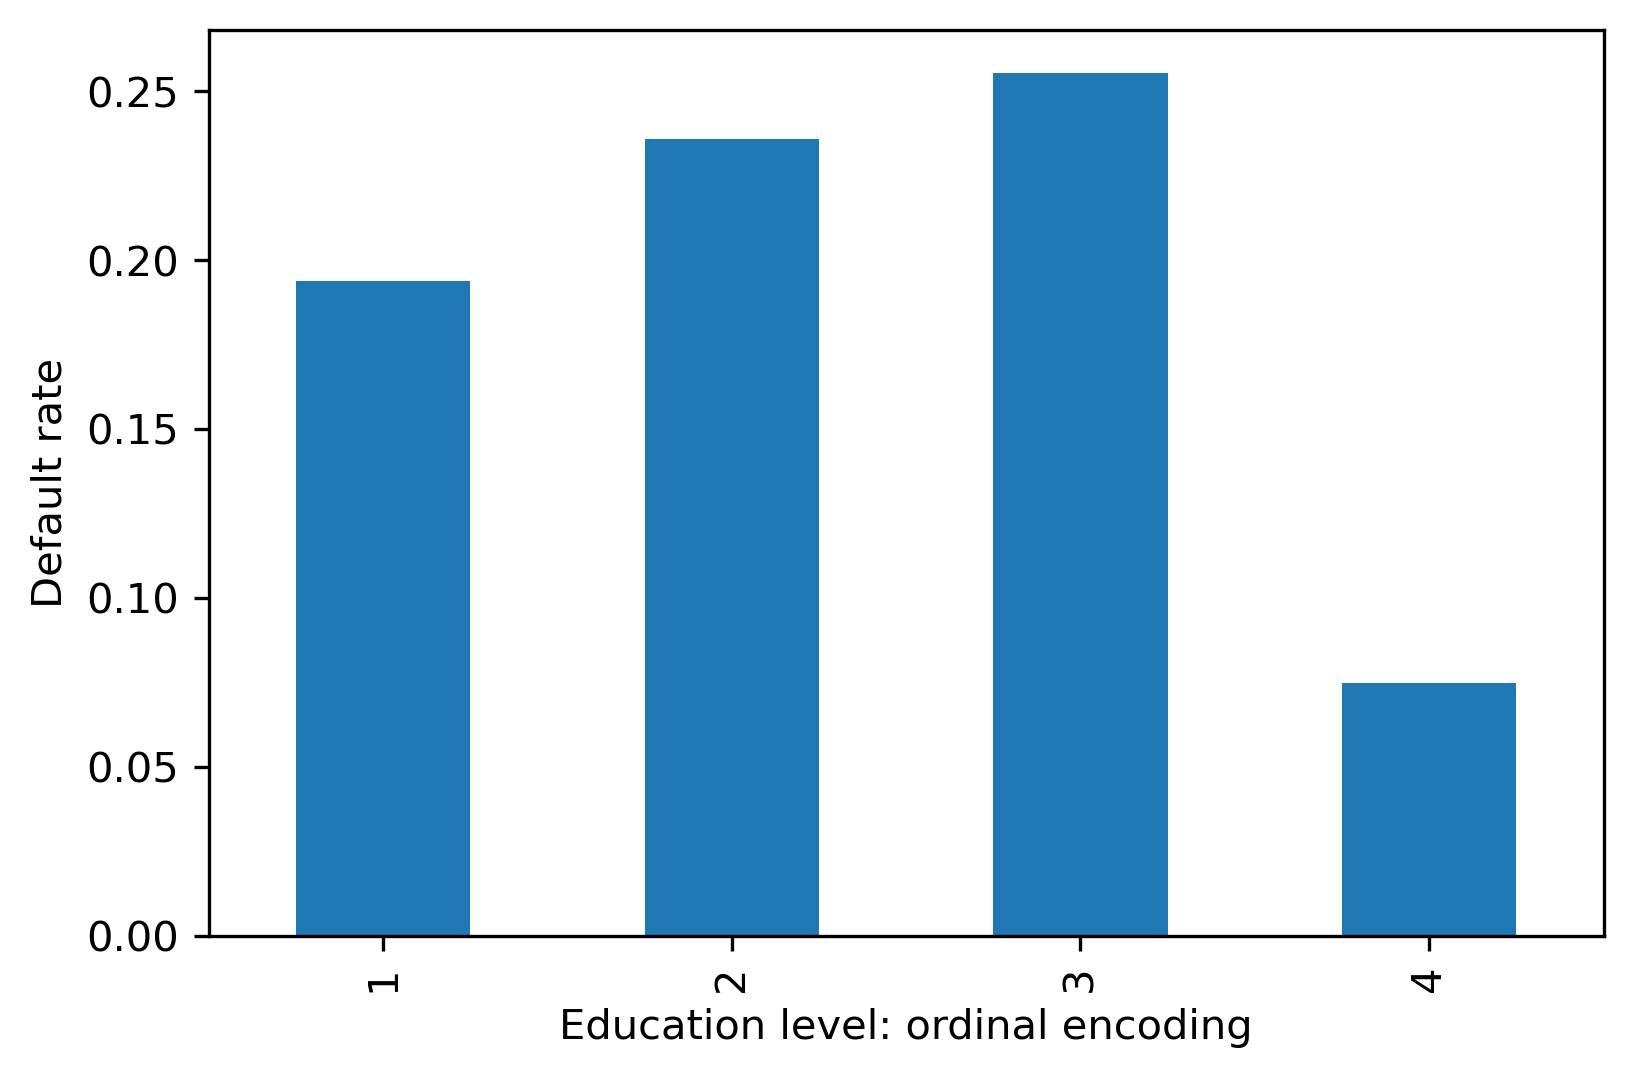

In [38]:
df_clean_2.groupby('EDUCATION').agg({'default payment next '\
                                    'month': 'mean'})\
                                    .plot.bar(legend = False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

It looks like a straight-line fit would probably not be the best description of the data here. In case a feature has a non-linear effect like this, it may be better to use a more complex algorithm such as a decision tree or random forest. Or, if a simpler and more interpretable linear model such as logistic regression is desired, we could avoid an ordinal encoding and use a different way of encoding categorical variables. A popular way of doing this is called one-hot
encoding (OHE).

In [39]:
df_clean_2['EDUCATION_CAT'] = 'none'

Created an empty column for the categorical labels.

In [40]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [41]:
# Creating a dictionary to map values to the new column
cat_mapping = {1: "graduate school", 2: "university", 3: "high school", 4: "others"}

In [42]:
df_clean_2["EDUCATION_CAT"] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [43]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


Across all these columns, any particular row will have a 1 in exactly 1 column, and 0s in the rest.

In [44]:
# Concatenating the one-hot encoded dataframe with the orig dataframe to examine the results side by side.

df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis =1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',\
            'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


The remaining features to be examined are the financial history features. They fall
naturally into three groups: the status of the monthly payments for the last 6 months,
and the billed and paid amounts for the same period.

In [45]:
df = df_with_ohe.copy(deep=True) # Copying the now cleaned data to the original dataframe.
# Will use df dataframe for further operations.

In [46]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [47]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


We see that the range of values is the same for all of these features: -2, -1, 0, ... 8. It appears that the value of 9, described in the data dictionary as payment delay for nine months and above, is never observed.

In [48]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

Compared to the positive integer values, most of the values are either -2, -1, or 0,
which correspond to an account that was in good standing last month: not used, paid
in full, or made at least the minimum payment.

<AxesSubplot:>

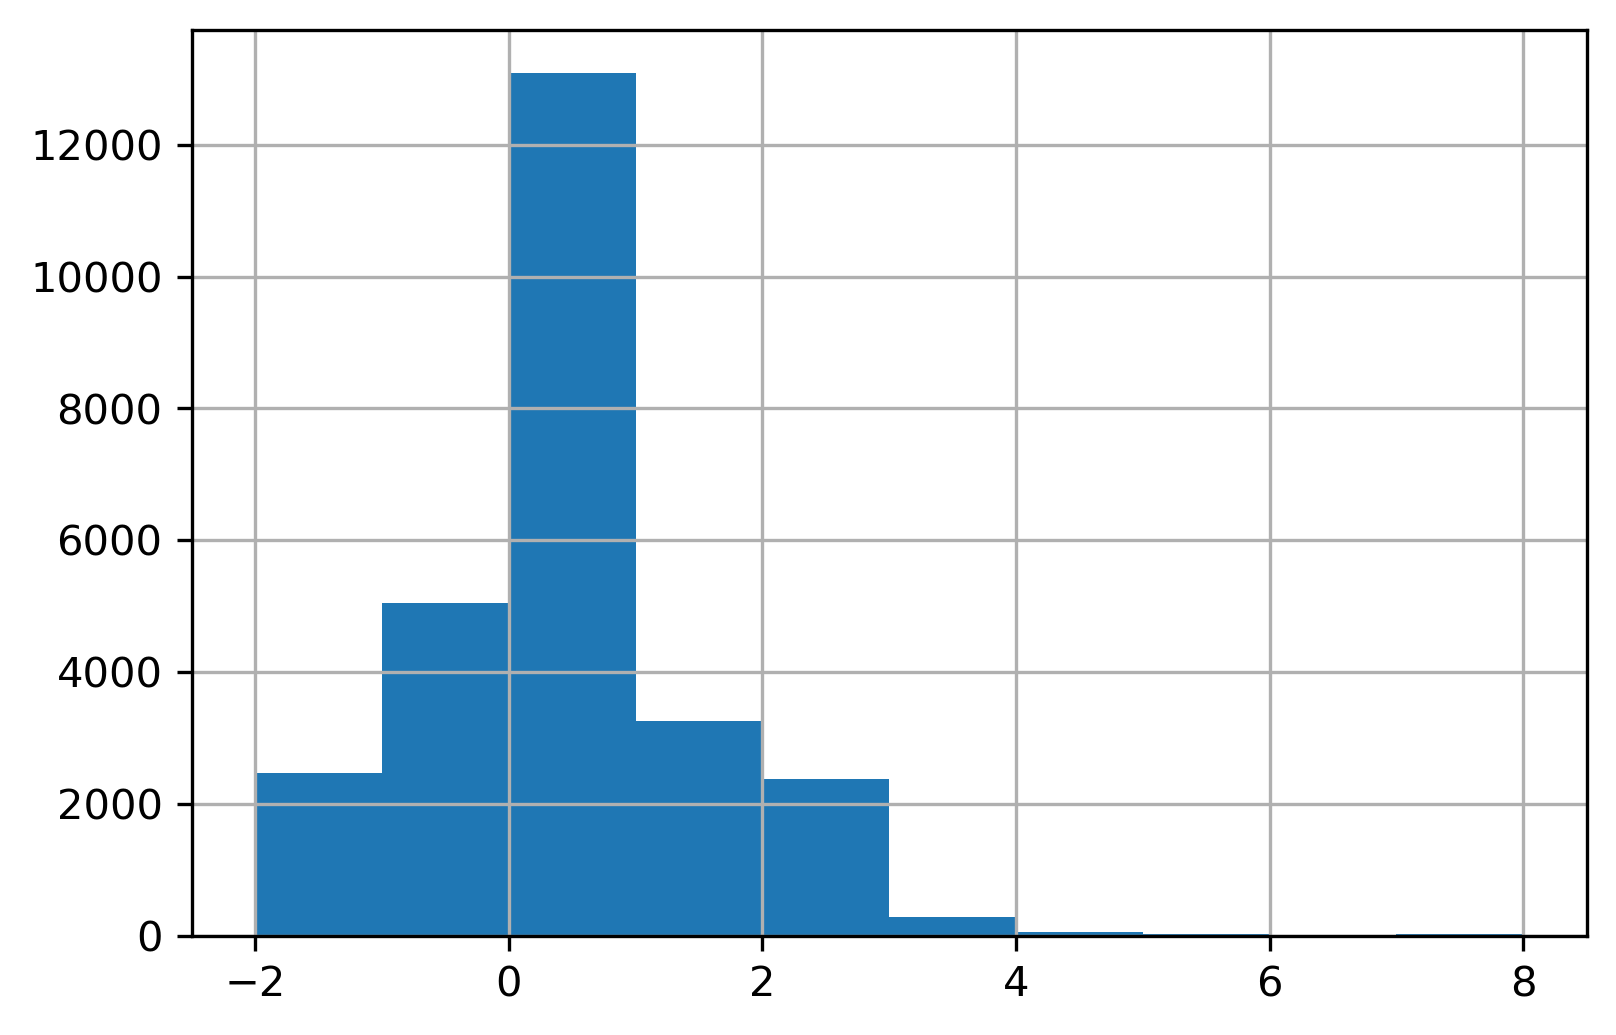

In [49]:
df[pay_feats[0]].hist()

In [50]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Specifying the bin edge locations for better control over the plot appearance.

Text(0, 0.5, 'Number of accounts')

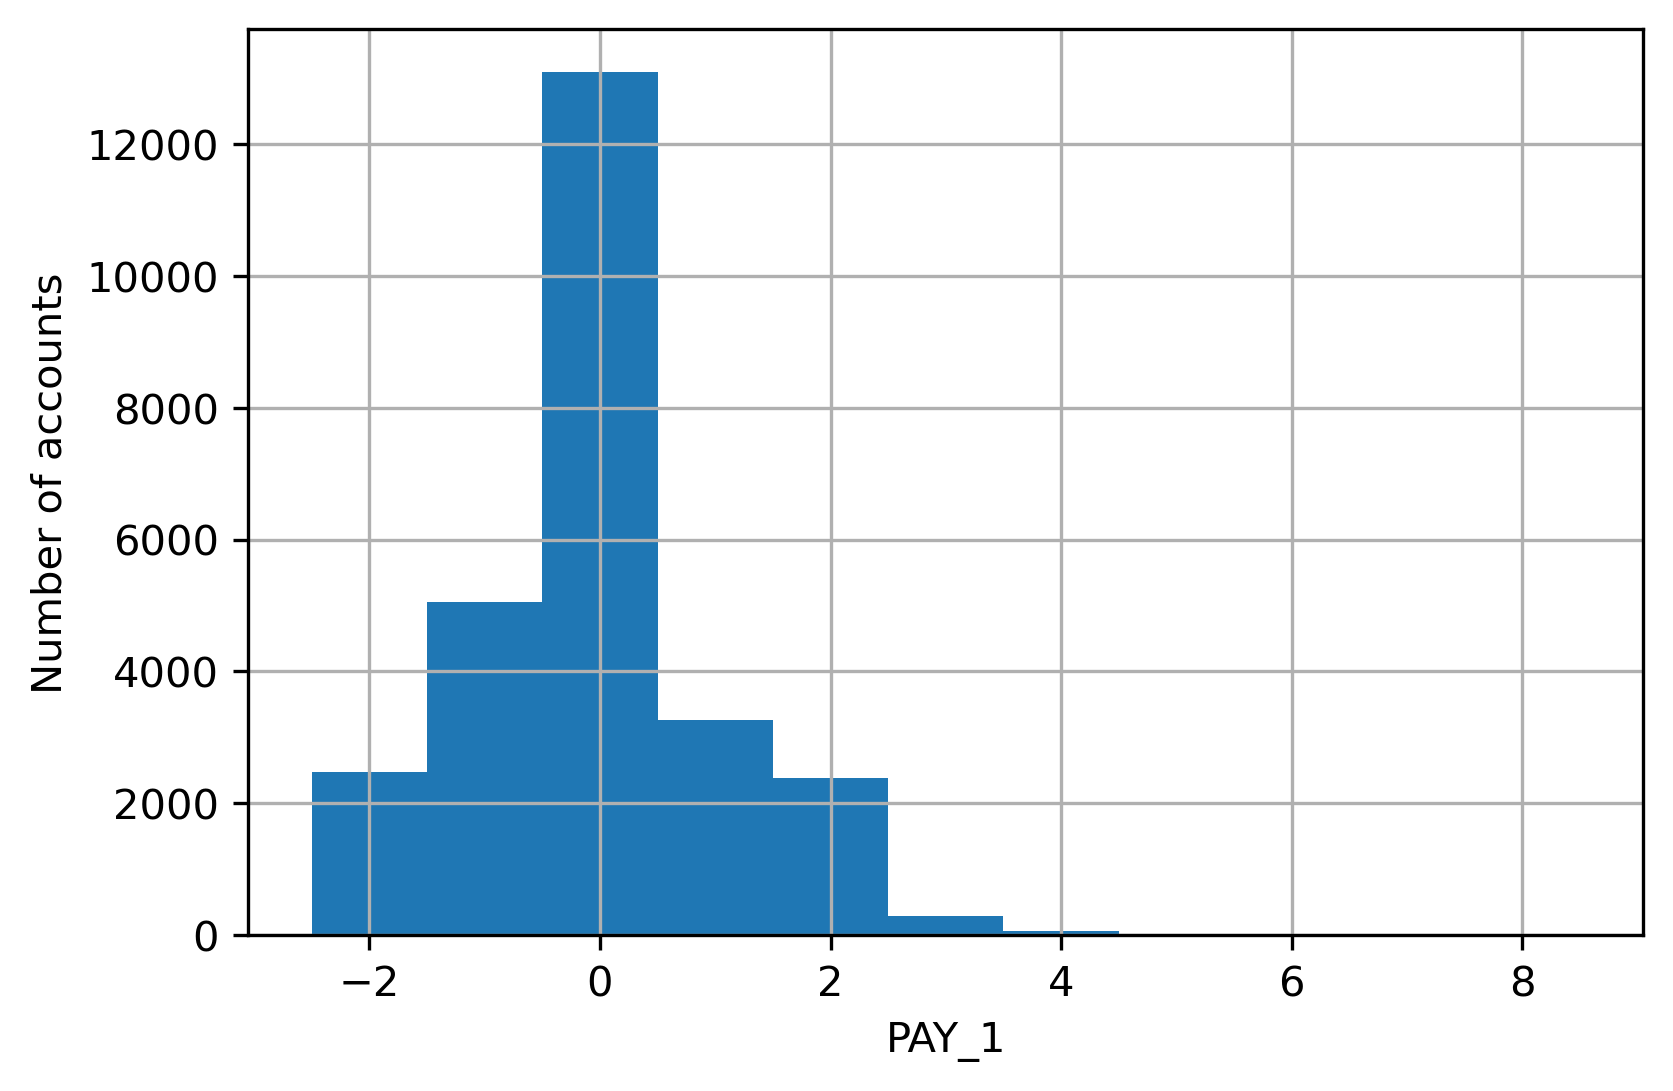

In [51]:
df[pay_feats[0]].hist(bins = pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

This is a better histogram since the bars are centered over the actual values in the data and there is 1 bar per unique value.

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

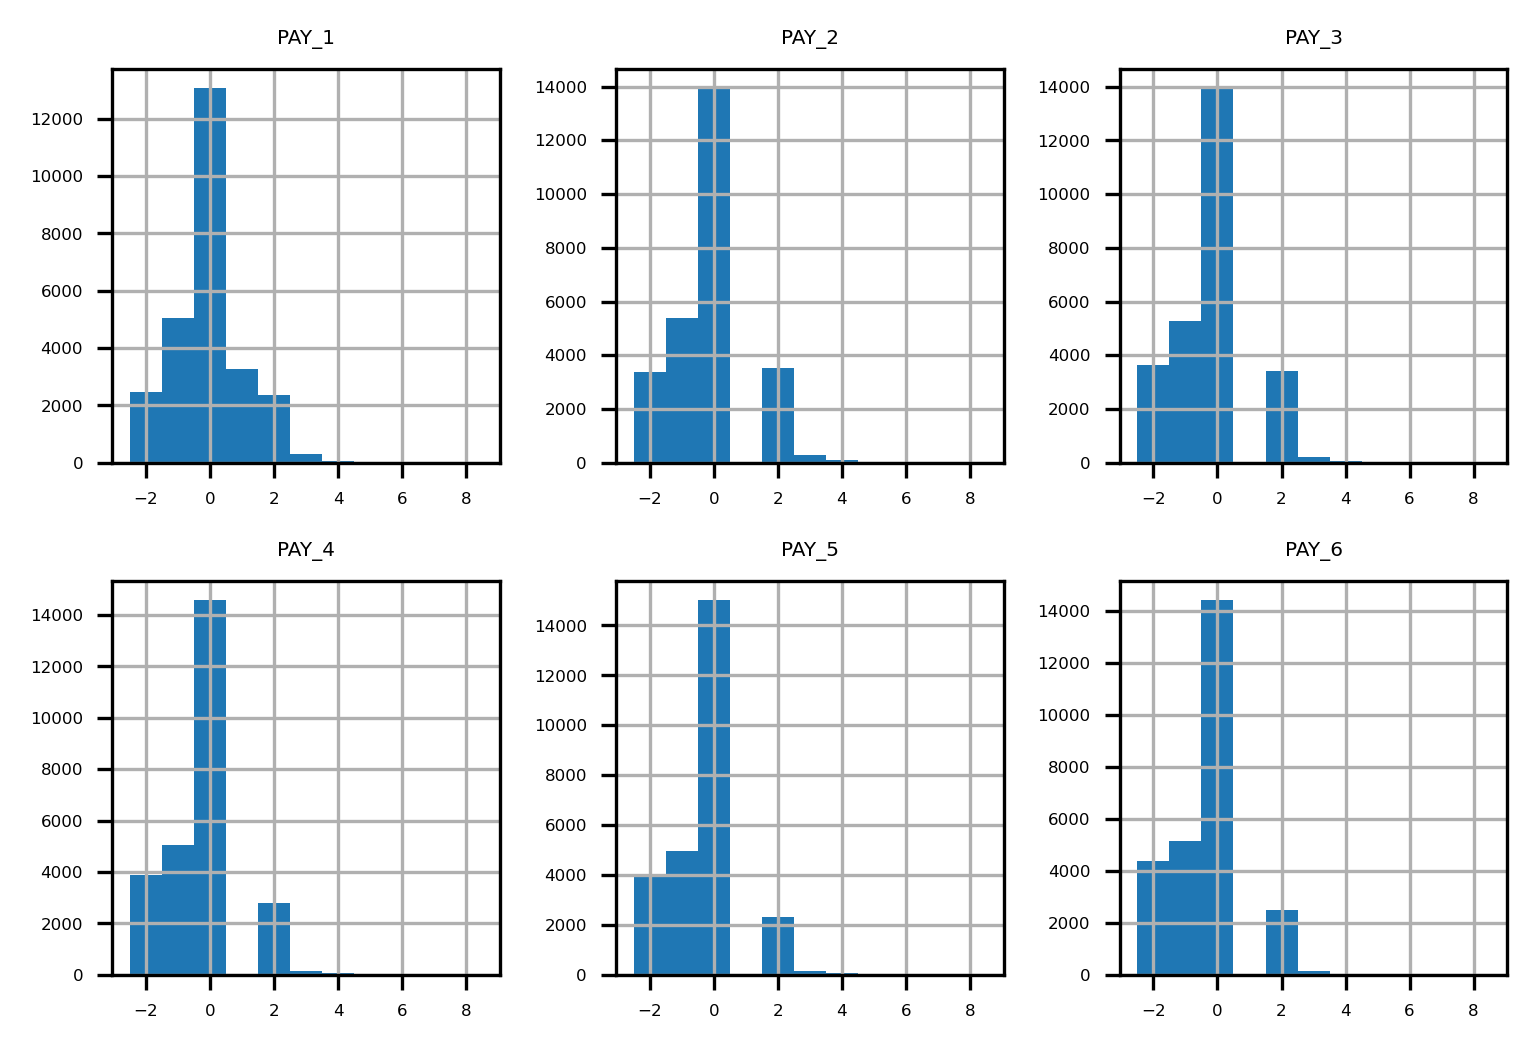

In [52]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins = pay_1_bins, layout = (2,3))

PAY_2 is the repayment status in August,
PAY_3 is the repayment status in July, and the others go further back in time. A value
of 1 means a payment delay for 1 month, while a value of 2 means a payment delay
for 2 months, and so forth. In July, there are very few accounts that had a 1-month
payment delay; this bar is not really visible in the histogram. However, in August,
there are suddenly thousands of accounts with a 2-month payment delay. This does
not make sense: the number of accounts with a 2-month delay in a given month
should be less than or equal to the number of accounts with a 1-month delay in the
previous month.

### Exploring the Remaining Financial Features in the Dataset

In [53]:
mpl.rcParams['font.size'] = 4
from scipy import stats

In [54]:
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [55]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

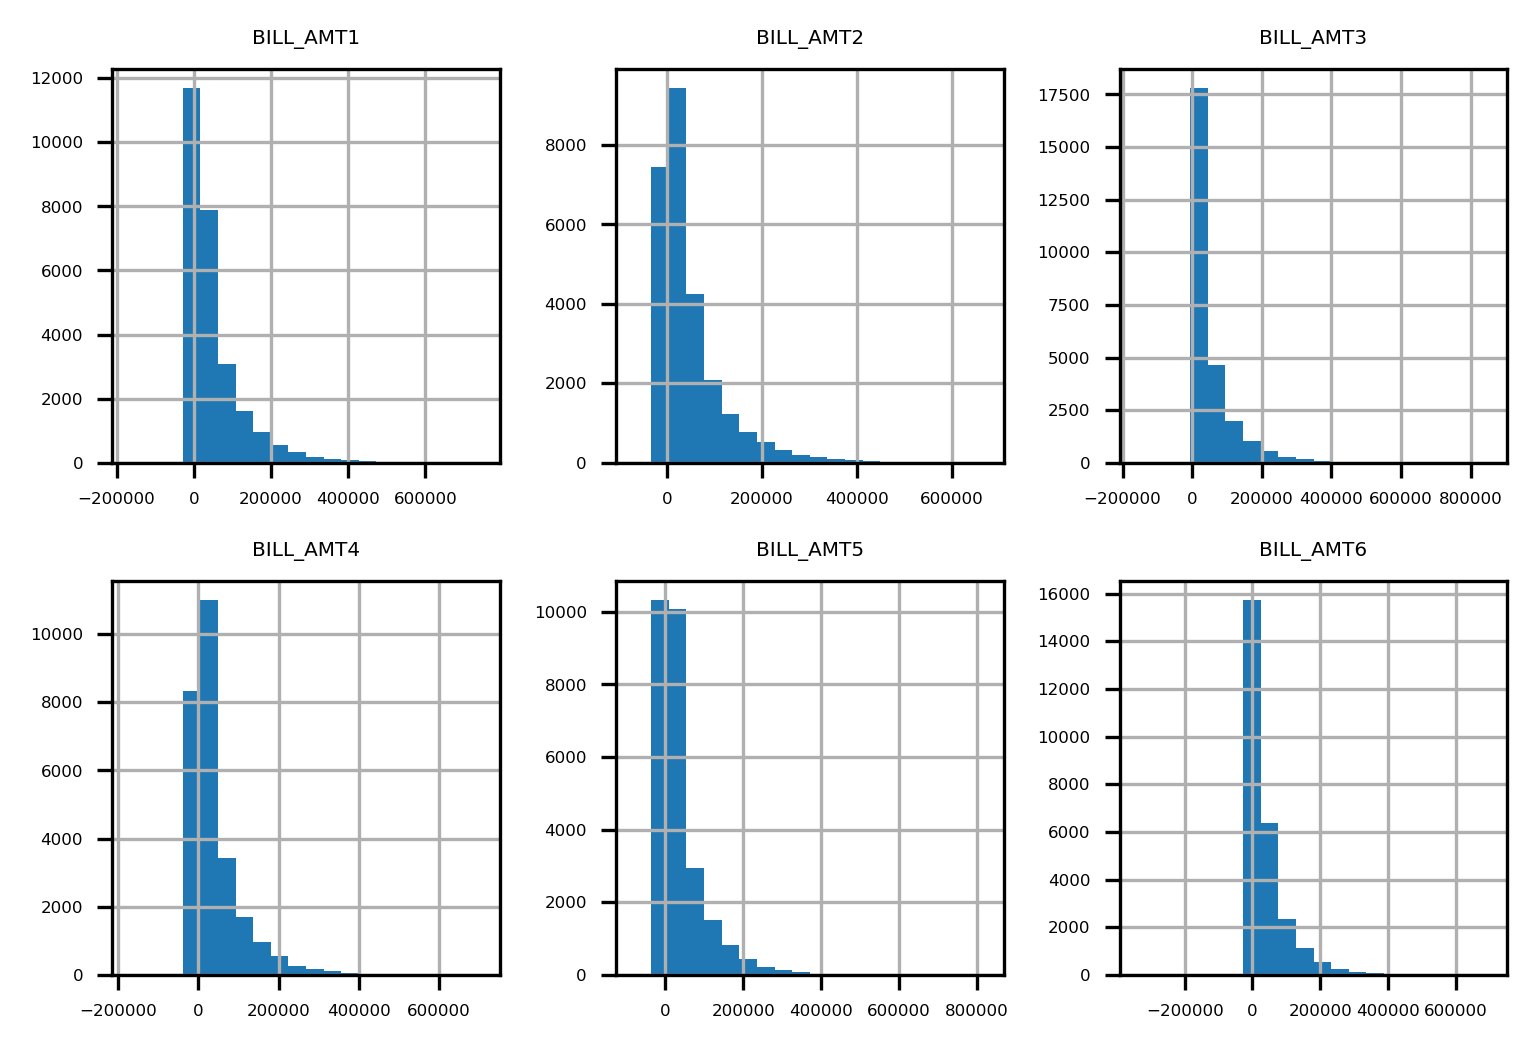

In [56]:
df[bill_feats].hist(bins = 20, layout = (2,3))

In [57]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

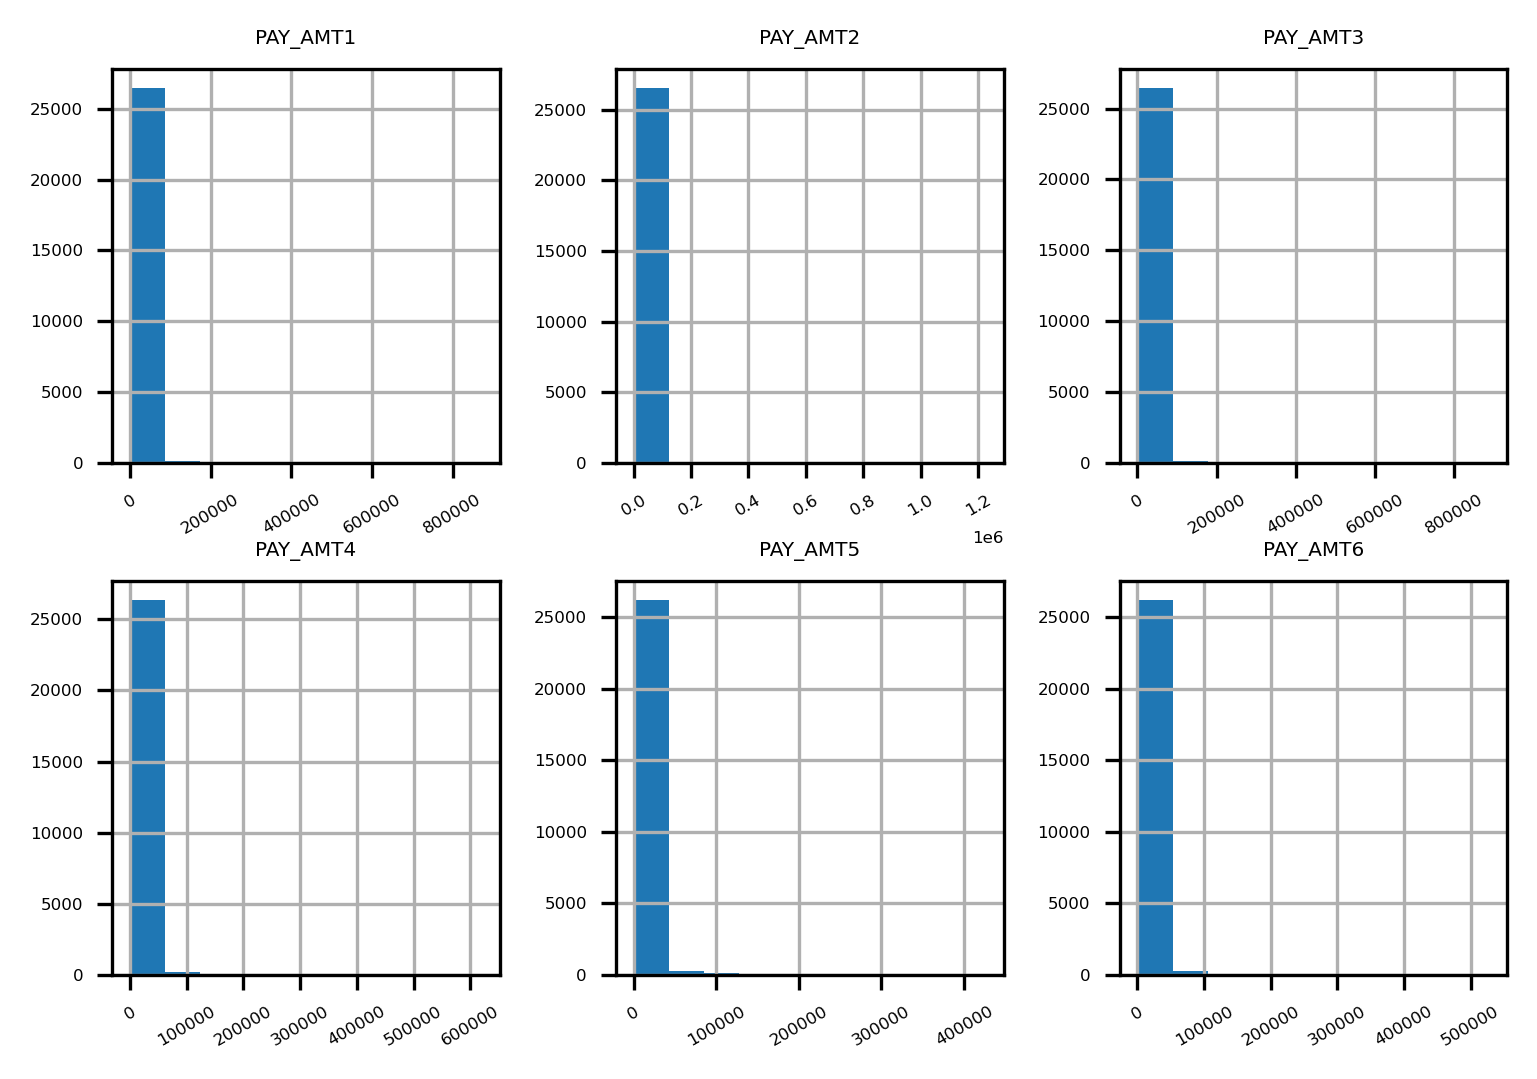

In [58]:
df[pay_amt_feats].hist(layout = (2,3), xrot = 30) # applying some rotation to the x-axis labels with the xrot keyword
# argument so that they don't overlap

In [59]:
pay_zero_mask = df[pay_amt_feats] == 0

Used a Boolean mask to see how much of the payment amount data is exactly
equal to 0

In [60]:
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [61]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

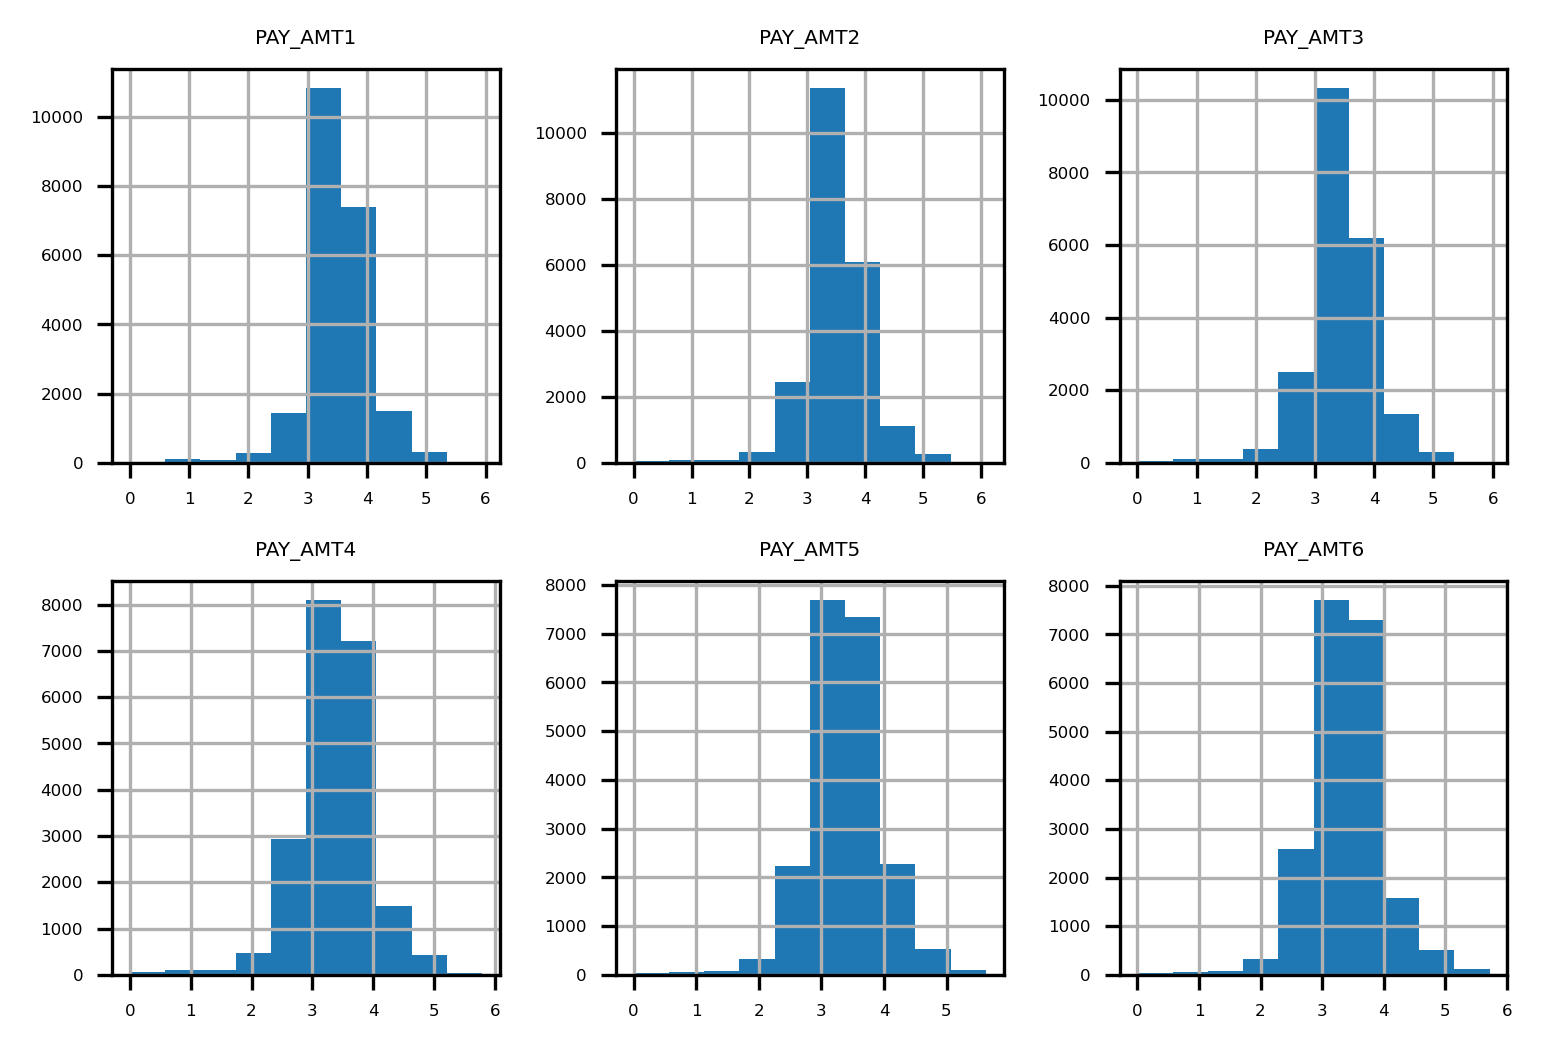

In [62]:
df[pay_amt_feats][~pay_zero_mask].apply(np.log10).hist(layout = (2,3))

Ignoring the payments of 0 using the mask created in the previous step,
used pandas' .apply() and NumPy's np.log10() to plot histograms of
logarithmic transformations of the non-zero payments. 